In [114]:
import os, numpy as np
from astropy.io import fits
from astropy.visualization import make_lupton_rgb, simple_norm
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.wcs.utils import pixel_to_skycoord
from astropy.coordinates import SkyCoord
# ------------------------------------------------------------------
# 1) download or point to the three science images -----------------
#    (here we assume they sit in your work dir after wget/curl)
files = {
    'B': 'cluster_img/abell2744/hlsp_frontier_hst_acs-60mas_abell2744_f435w_v1.0-epoch2_drz.fits',
    'G': 'cluster_img/abell2744/hlsp_frontier_hst_acs-60mas_abell2744_f606w_v1.0-epoch2_drz.fits',
    'R': 'cluster_img/abell2744/hlsp_frontier_hst_acs-60mas_abell2744_f814w_v1.0-epoch2_drz.fits',
    'IR': 'cluster_img/abell2744/hlsp_frontier_hst_wfc3-60mas_abell2744_f160w_v1.0_drz.fits'
}

# ------------------------------------------------------------------
# 2) read the image planes (extension 0 is the science array) ------
blue  = fits.getdata(files['B'], 0, memmap=True) * 4
green = fits.getdata(files['G'], 0, memmap=True) * 0.7
red   = fits.getdata(files['R'], 0, memmap=True) * 0.65
# ir   = fits.getdata(files['IR'], 0, memmap=True)
# red  = (red + ir) / 2.0 *0.7


In [115]:
rgb = make_lupton_rgb(red, green, blue, Q=10, stretch=0.03)

/home/dices/.venv/lib/python3.12/site-packages/astropy/visualization/lupton_rgb.py:614: RuntimeWarning: invalid value encountered in divide
  fInorm = np.where(Int <= 0, 0, np.true_divide(fI, Int))


/tmp/ipykernel_139835/3077725924.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x_rot, y_rot, s=60, c='red', marker='x', ec='black', lw=0.5)


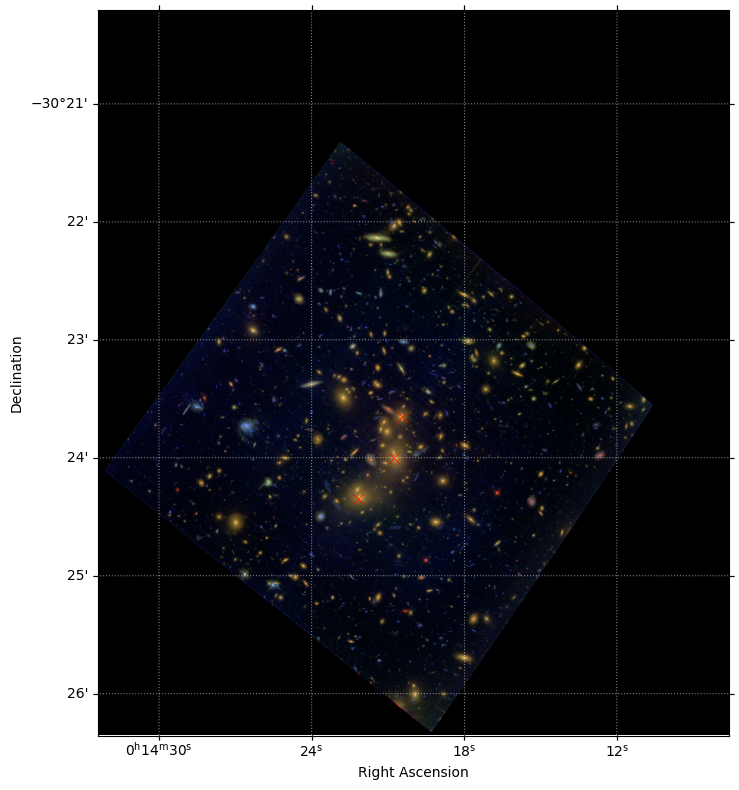

In [129]:
wcs = WCS(fits.getheader(files['R']))     # all mosaics share the same WCS
fig = plt.figure(figsize=(8, 8))
ax  = plt.subplot(projection=wcs)

ra_dec  = [(3.58650, -30.4000),   # RA, Dec in deg – e.g. multiply-imaged galaxy
           (3.58520, -30.3943),
           (3.59240, -30.4059)]

# convert to original pixel coords
pix = [wcs.world_to_pixel(SkyCoord(ra, dec, unit='deg')) for ra, dec in ra_dec]
x_rot, y_rot = zip(*[(x, y) for x, y in pix])

ax.imshow(rgb, origin='lower')
ax.scatter(x_rot, y_rot, s=60, c='red', marker='x', ec='black', lw=0.5)
ax.coords.grid(color='white', ls='dotted', alpha=0.5)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
plt.tight_layout();  plt.show()